In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Uniform Distribution

In [126]:
data = pd.DataFrame(stats.uniform.rvs(size = 10000, loc = 0, scale = 10))   #here loc = lower limit ; scale = upper limit

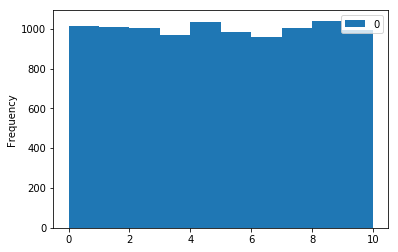

In [184]:
data.plot(kind = 'hist', figsize = (6,4))

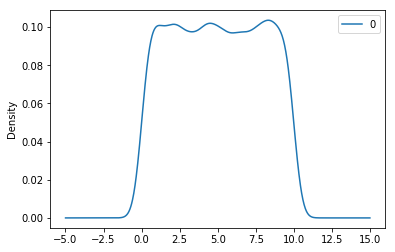

In [135]:
data.plot(kind = 'density')

In [138]:
stats.uniform.cdf(9, loc = 0, scale = 10)

0.9

In [139]:
stats.uniform.ppf(0.4, loc = 0, scale = 10)

4.0

In [146]:
stats.uniform.pdf(10, loc = 0, scale = 10)

0.1

## Normal Distribution

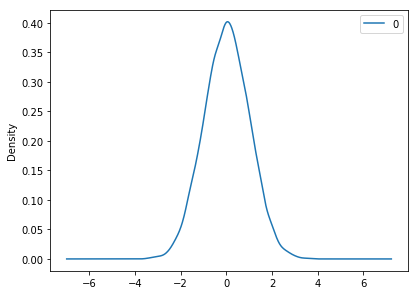

In [190]:
normal_data = stats.norm.rvs(size = 10000, loc = 0, scale = 1)  # here loc = center; scale = std. deviation
pd.DataFrame(normal_data).plot(kind = 'density')

In [174]:
1 - stats.norm.cdf(2, loc = 0, scale = 2)

0.15865525393145707

In [173]:
stats.norm.cdf(2, loc = 0, scale = 2) - stats.norm.cdf(-2, loc = 0, scale = 2)

0.6826894921370859

In [197]:
plt.rcParams["figure.figsize"] = (9,9)

In [205]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] #reset rcparams to default

Text(1.1, 0.05, '0.159')

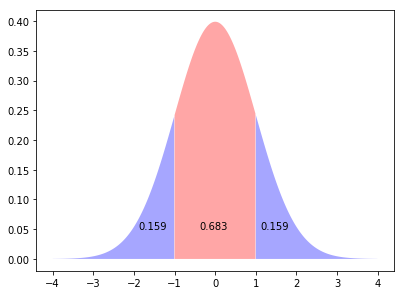

In [244]:
plt.fill_between(x = np.arange(-4,-1,0.01), y1 = stats.norm.pdf(np.arange(-4,-1,0.01)), facecolor ='blue', alpha = 0.35)
plt.fill_between(x = np.arange(1,4,0.01), y1 = stats.norm.pdf(np.arange(1,4,0.01)), facecolor ='blue', alpha = 0.35)
plt.fill_between(x = np.arange(-1,1,0.01), y1 = stats.norm.pdf(np.arange(-1,1,0.01)), facecolor ='red', alpha = 0.35)

plt.text(x = -1.9, y = 0.05, s = round(stats.norm.cdf(-1, loc = 0, scale = 1),3)) #, rotation = 90)
plt.text(x = -0.4, y = 0.05, s = round(stats.norm.cdf(1, loc = 0, scale = 1)-stats.norm.cdf(-1, loc = 0, scale = 1),3))
plt.text(x = 1.1, y = 0.05, s = round(1 - stats.norm.cdf(1, loc = 0, scale = 1),3))

fill in between [x1,x2,x3] and [y1,y2,y3]

alpha = to change transparency

In [223]:
stats.norm.pdf(0,loc = 0, scale = 1) # peak of bell curve

0.3989422804014327

## Binomial Disribution

In [286]:
binomial_data = pd.DataFrame(stats.binom.rvs(10, 0.5, size = 1000))   # (n - no. of trials,p - probability ,size - no. of outputs)

In [308]:
pd.crosstab(index = 'c', columns = np.array(binomial_data[0]))

col_0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,
c,8,44,114,210,257,215,112,29,10,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC019D7BA8>]],
      dtype=object)

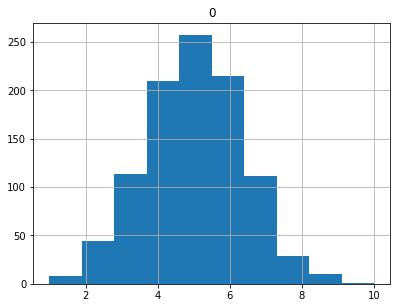

In [287]:
binomial_data.hist()

In [318]:
skewed_binomial = pd.DataFrame(stats.binom.rvs(10, 0.8, size = 10000))  # skewed data
pd.crosstab(columns = np.array(skewed_binomial[0]), index = 'count')

col_0,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,
count,1,7,54,281,883,1945,3037,2708,1084


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC01D46E80>]],
      dtype=object)

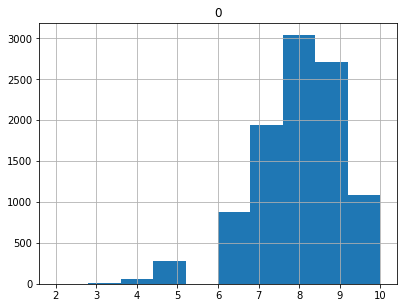

In [319]:
skewed_binomial.hist()

In [334]:
print(stats.binom.cdf(k = 5, n = 10, p = 0.8))   # k = k of successes or less
print(stats.binom.cdf(k = 5, n = 10, p = 0.5))

0.032793497599999964
0.6230468749999999


In [335]:
print(1 - stats.binom.cdf(k = 5, n = 10, p = 0.8))   # more than k successes 
print(1 - stats.binom.cdf(k = 5, n = 10, p = 0.5))

0.9672065024000001
0.3769531250000001


In [339]:
stats.binom.pmf(k = 7, n = 10, p = 0.5)  # probability of getting 7 successes
# probability mass function is used for discrete probability

0.11718750000000014

In [340]:
stats.binom.pmf(k = 3, n = 10, p = 0.8)

0.0007864319999999992

## The Geometric and Exponential Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC01D84400>]],
      dtype=object)

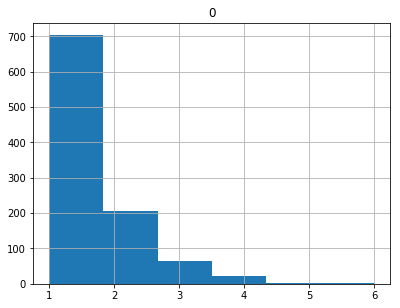

In [344]:
trials_needed = pd.DataFrame(stats.geom.rvs(size = 1000, p = 0.7))
trials_needed.hist(bins = max(trials_needed[0]))

In [343]:
trials_needed[0].unique()

array([1, 3, 2, 4, 6, 5], dtype=int64)

In [345]:
stats.geom.pmf(k = 5, p = 0.5)

0.03125

In [346]:
stats.geom.cdf(k = 5, p = 0.5)

0.96875

In [394]:
time_needed = pd.DataFrame(stats.expon.rvs(size = 1000, scale = 1))   #scale is arrival rate

#Note: The average arrival time for the exponential distribution is equal to 1/arrival_rate.

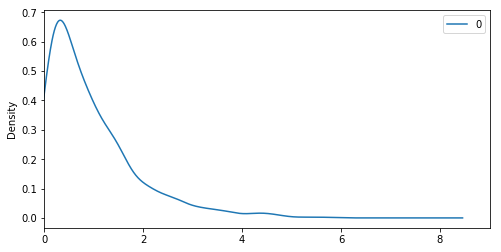

In [395]:
time_needed.plot(kind = 'density', xlim = 0)

In [396]:
stats.expon.cdf(x = 0, scale = 1)

0.0

In [361]:
1 - stats.expon.cdf(x = 1, scale = 1)  # probability of waiting more than 1 time unit before success

0.09516258196404044

Text(2, 0.005, '0.368')

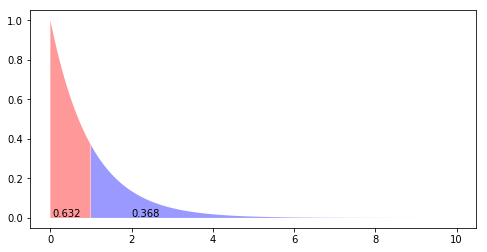

In [393]:
plt.rcParams['figure.figsize'] = (8,4) 
plt.fill_between(x = np.arange(0,1,0.01), y1 = stats.expon.pdf(np.arange(0,1,0.01), scale = 1), facecolor = 'red', alpha = 0.4 )
plt.text(x = 0.05, y= 0.005, s = round(stats.expon.cdf(x = 1, scale = 1), 3))
plt.fill_between(x = np.arange(1,10,0.01), y1 = stats.expon.pdf(np.arange(1,10,0.01), scale = 1), facecolor = 'blue', alpha = 0.4 )
plt.text(x = 2, y= 0.005, s = round(1 - stats.expon.cdf(x = 1, scale = 1), 3))

In [398]:
stats.expon.pdf(x=3,scale = 1)

0.049787068367863944

## Poisson Distribution

When arrival rate mu is small, it is exponential curve. When mu increases, it becomes more like normal distribution

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
count,385,337,187,70,18,2,1


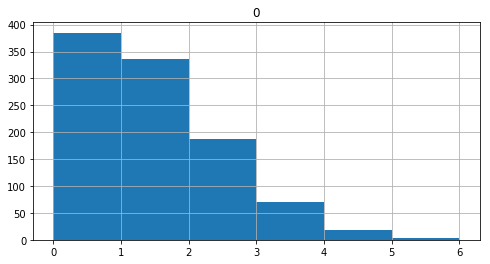

In [419]:
arrival_rate_1 = stats.poisson.rvs(size = 1000, mu = 1)  # mu = average arrival time
pd.DataFrame(arrival_rate_1).hist( bins = max(arrival_rate_1))
pd.crosstab(columns = arrival_rate_1, index = 'count')

col_0,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,24
row_0,,,,,,,,,,,,,,,,,,,,,
count,1,1,10,14,27,65,100,118,119,128,...,46,27,28,11,9,2,3,2,2,1


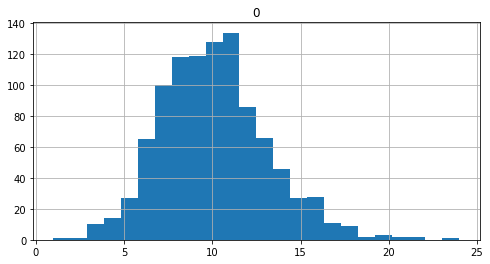

In [418]:
arrival_rate_10 = stats.poisson.rvs(size = 1000, mu = 10)
pd.DataFrame(arrival_rate_10).hist(bins = max(arrival_rate_10))
pd.crosstab(columns = arrival_rate_10, index = 'count')

In [410]:
stats.poisson.cdf(k = 10, mu = 10)

0.5830397501929852

In [411]:
stats.poisson.pmf(k = 10, mu = 10)

0.12511003572113372

In [413]:
stats.poisson.cdf(k = 10, mu = 1)

0.9999999899522336

In [414]:
stats.poisson.pmf(k = 10, mu = 1)

1.0137771196302987e-07